In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import var as var
import sys

sys.path.insert(1, './script/')
import caged as scCAGED
import censo as scCenso
import ibge as scIBGE


In [2]:
def showMean(text, data, column, showLogs):
    dic = {}

    if showLogs:
        print(text)

    for ano in data['ANO'].unique():
        dataAno = data.loc[data['ANO'] == ano]
        dic[ano] = round(dataAno[column].mean(), 3)

        if showLogs:
            print(ano, round(dataAno[column].mean(), 3))
    
    if showLogs:
        print('\n')
        
    return dic

def calcPercentage(dic1, dic2, integer=False, showLogs=False):
    pct = []
    
    for ano in dic1.keys():
        
        if dic1[ano] > 0:
            conta = round((dic2[ano]*100) / dic1[ano], 1)
        else:
            conta = 0

        if integer:
            conta = int(conta)
            
        pct.append(str(conta) + '%')
        
        if showLogs:
            print('{}:\n>>> porcentagem de computação: {}%'.format(ano, conta))

    return pct

def makeImage(dicTotal, dicComp, pct, yLabel, labelImage, putPercentage, integer, imageLocation, some2009, togheter=True):
    
    fig = plt.figure(figsize=(8, 5))

    cores = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
    cores2 = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

    if togheter:

        # Configurando o gráfico de barras  
        plt.bar(dicTotal.keys(), dicTotal.values(), color=cores, label='Total')
        plt.bar(dicComp.keys(), dicComp.values(), color=cores2, label='Computação')

        if some2009:
            plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
        else:
            plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])


        if putPercentage and not integer:
            pontoFlutuante = 0.58
            sizeAnotacao = 9.3
            
            for pct, ano in zip(pct, dicTotal.keys()):
                plt.annotate(pct, (float(ano - 1) + pontoFlutuante, dicComp[ano]/2), color='white', size=sizeAnotacao)

        elif putPercentage and integer:

            pontoFlutuante = 0.67
            sizeAnotacao = 10
            
            for pct, ano in zip(pct, dicTotal.keys()):
                plt.annotate(pct, (float(ano - 1) + pontoFlutuante, dicComp[ano]/2), color='white', size=sizeAnotacao)

    else:
        # Posições das barras no eixo x
        posicoes = np.arange(len(dicTotal.keys()))

        # Largura das barras
        largura = 0.45

        plt.bar(posicoes, dicTotal.values(), largura, color=cores, label='Total')
        plt.bar(posicoes + largura, dicComp.values(), largura, color=cores2, label='Computação')
        plt.xticks(posicoes + 0.21, dicTotal.keys())

        
    # Adicionando legendas e rótulos
    plt.xlabel('Ano')
    plt.ylabel(yLabel)
    # plt.title('Salário das áreas econômicas de computação ao longo dos anos, pelo\nconjunto total dos municípios e do conjunto de computação.')
    plt.legend(loc=imageLocation)

    plt.savefig('./result/INEP_{}.png'.format(labelImage))
    plt.show()

def makeMedia(data1, data2, column, yLabel, labelImage, imageLocation="upper right", integer=False, showLogs=False, putPercentage=False, togheter=True):
    some2009 = False

    if column == 'C_EVASAO' or column == 'C_PERMANENCIA':
        some2009 = True
        data1 = data1.drop(data1.loc[data1['C_EVASAO'] == 999999].index)
        data2 = data2.drop(data2.loc[data2['C_EVASAO'] == 999999].index)
    
    dicTotal = showMean('Total', data1, column, showLogs)

    dicComp = showMean('Computação', data2, column, showLogs)

    pct = calcPercentage(dicTotal, dicComp, integer, showLogs)

    makeImage(dicTotal, dicComp, pct, yLabel, labelImage, putPercentage, integer, imageLocation, some2009, togheter)


In [3]:
data = pd.read_parquet(f'./result/INEP_cmplt_e.parquet')

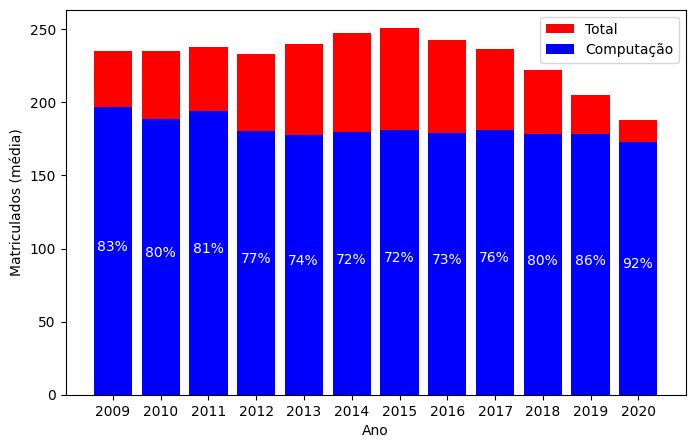

In [4]:
makeMedia(data, data[data['NO_CINE_ROTULO'] == 'Ciência da computação'], 'QT_MAT', 'Matriculados (média)', 'MATRICULADOS', integer=True, showLogs=False, putPercentage=True)

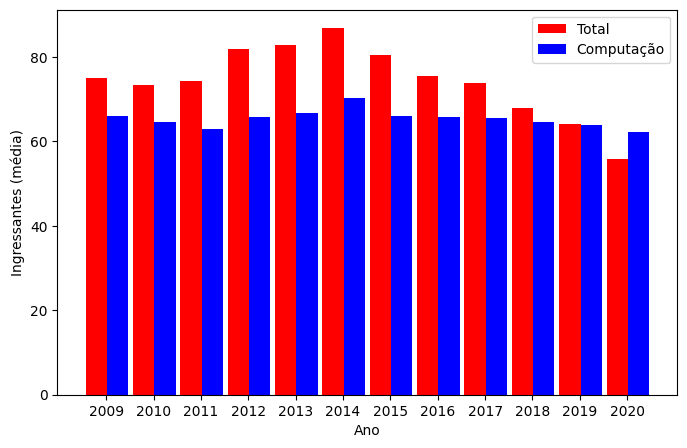

In [5]:
makeMedia(data, data[data['NO_CINE_ROTULO'] == 'Ciência da computação'], 'QT_ING', 'Ingressantes (média)', 'INGRESSANTES', integer=True, showLogs=False, putPercentage=True, togheter=False)

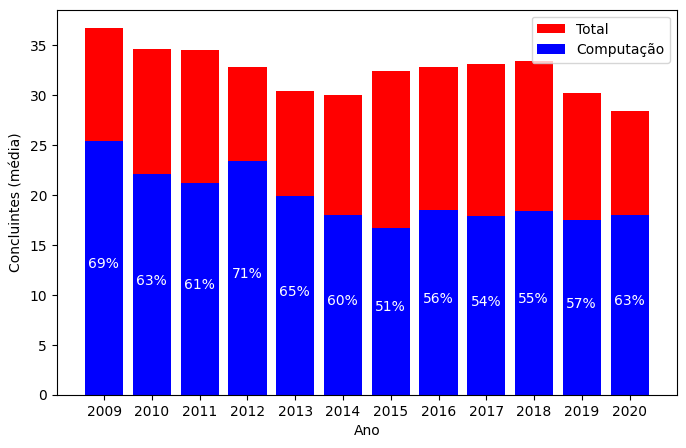

In [6]:
makeMedia(data, data[data['NO_CINE_ROTULO'] == 'Ciência da computação'], 'QT_CONC', 'Concluintes (média)', 'CONCLUINTES', integer=True, showLogs=False, putPercentage=True, togheter=True)

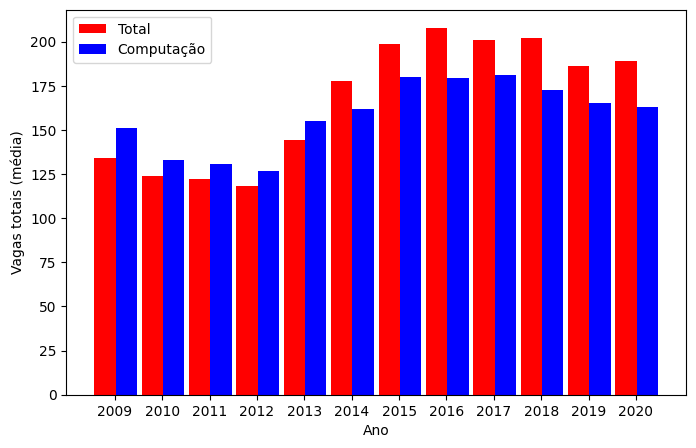

In [7]:
makeMedia(data, data[data['NO_CINE_ROTULO'] == 'Ciência da computação'], 'QT_VG_TOTAL', 'Vagas totais (média)', 'VAGA-TOTAL', imageLocation="upper left", integer=True, showLogs=False, putPercentage=True, togheter=False)